In [1]:

import sys
sys.path.append("../../")

from fi.client import Client

In [2]:
from datasets import load_dataset

ds = load_dataset("osunlp/MagicBrush")

Resolving data files:   0%|          | 0/51 [00:00<?, ?it/s]

In [3]:
ds["train"][0]

{'img_id': '327726',
 'turn_index': 1,
 'source_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x500>,
 'mask_img': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 'instruction': 'change the table for a dog',
 'target_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>}

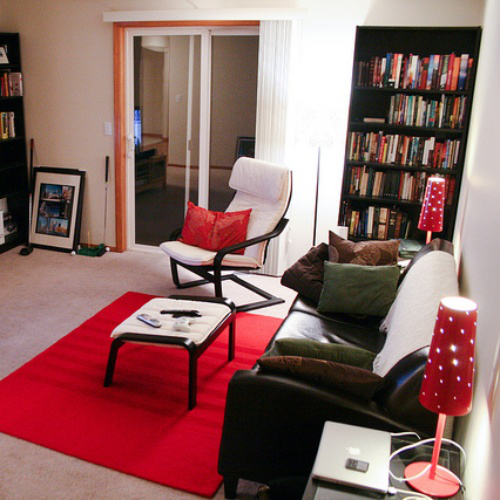

In [4]:
ds["train"][0]["source_img"]

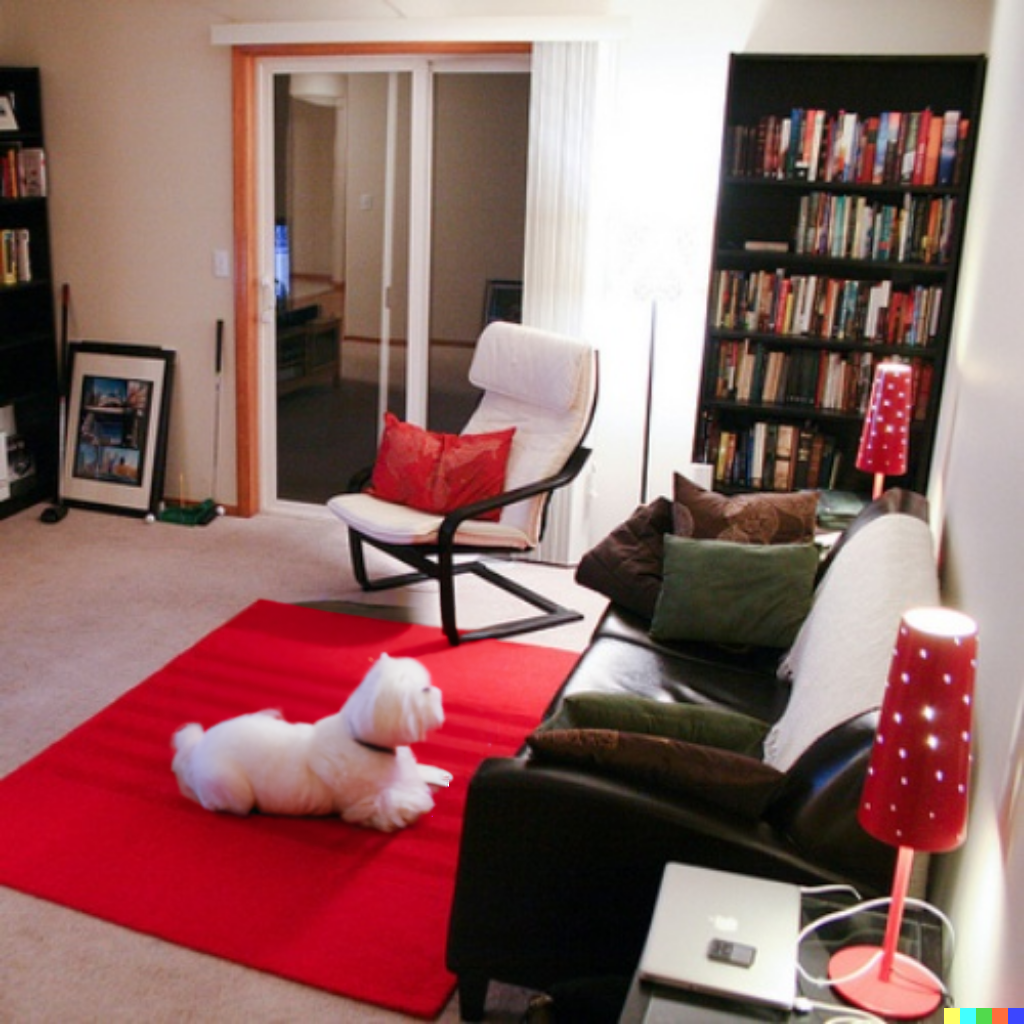

In [5]:
ds["train"][0]["target_img"]

In [6]:
fi_client = Client(
  api_key="f176088f0e794ac7ac38d65bab1687c7",
  secret_key="e2d4553e16f34b07ab18b7d50b382f81"
)

In [6]:
fi_client = Client(
  uri="https://dev.api.futureagi.com",
  api_key="8437d413519a4b7aad0a9d73bee01f2d",
  secret_key="880e66bafcb04352aaae824f8f2334cc"
)

In [7]:
from fi.client import ModelTypes, Environments
import uuid
import time
from PIL import Image
import base64
from io import BytesIO

In [8]:
import time
import random
import datetime

def generate_random_date():
    # Get the current time
    now = time.time()
    
    # Calculate the timestamp for two weeks ago (14 days * 24 hours * 60 minutes * 60 seconds)
    two_weeks_ago = now - (6*30 * 24 * 60 * 60)
    
    # Generate a random timestamp between two weeks ago and now
    random_timestamp = random.uniform(two_weeks_ago, now)
    
    return random_timestamp

In [9]:
def to_byte_image(image):
	buffered = BytesIO()
	image.save(buffered, format="JPEG")

	# Get the byte data
	img_byte = buffered.getvalue()

	# Encode the byte data to base64
	img_base64 = base64.b64encode(img_byte).decode('utf-8')

	# Create the base64 string with the data URI scheme
	img_base64_str = f"data:image/jpeg;base64,{img_base64}"

	# Output the result
	return img_base64_str

In [10]:
for i in range(1):
	fi_client.log(
	"generative-image-model-v2",
	ModelTypes.GENERATIVE_IMAGE,
	Environments.PRODUCTION,
	"v1",
	#   str(uuid.uuid4()),
	int(generate_random_date()),
	{
		"chat_history": [
			{
				"role": "user",
				"content": [
					{"type": "text", "text": ds["train"][i]["instruction"] },
					{"type": "image_url", "image_url": {"url": to_byte_image(ds["train"][i]["source_img"])}},
				]
			},
			{
				"role": "assistant",
				"content": [
					{"type": "image_url", "image_url": {"url": to_byte_image(ds["train"][i]["target_img"])}}
				]
			}
		]
	}
).result()